In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## EPS table lookup algo

1. Choose a row from the table. 
2. With the input, do binary tree search in the row, find the position i where key_table_row[i] < input and key_table_row[i+1] >= input
3. Set output to:
```
value_table_row[i] + (input - key_table_row[i]) * (value_table_row[i+1] - value_table_row[i]) / (key_table_row[i+1] - key_table_row[i])
```


## CAN 0xe4 torque processing by math and lookup tables (Civic sedan)

### Step 1: Mutipled by sqrt(3)
```
can_e4_torque = can_e4_torque * sqrt(3)
```

### Step 2: Scaled down to 1/4 and clamped to [-0x6ee, 0x6ee]
```
can_e4_torque = can_e4_torque >> 2
can_e4_torque = clamp(can_e4_torque, -0x6ee, 0x6ee)
```

### Step 3: Mutiplication using 3 tables (TODO, missing a table data)
```
w1 = ?
w2 = ?
v1 = table_1_lookup()
v2 = table_2_lookup()
v3 = w1 * v1 + w2 * v2
v4 = table_3_lookup()
multiplier = v4 * (v3 >> 0xe)
can_e4_torque = multiplier * can_e4_torque
```

### Step 4: Final torque curve

In [29]:
# Input: the abs of can_e4_torque.
# Output range: see the value_table.

# started at address 0x1371c

key_table = [
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,     
    0x0, 0xDE, 0x1BB, 0x299, 0x377, 0x455, 0x532, 0x610, 0x6EE
]

# started at address 0x1379a)
value_table = [
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680, 0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x6B3, 0xB1A,  0xCCD,   0xE9A,   0x104D,  0x119A,  0x11DA,  0x11DA
]



Text(0.5, 1.0, 'Torque Value table')

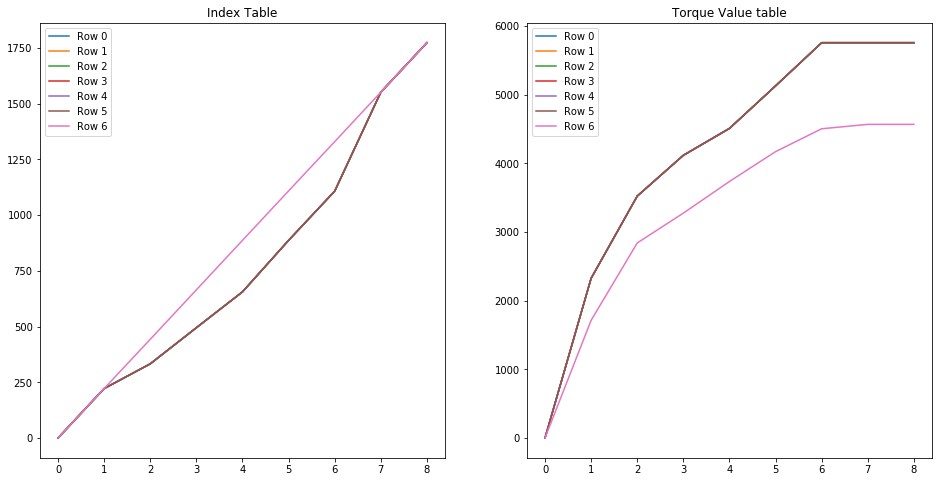

In [17]:
figsize(16,8)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(key_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Key Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Torque Value table")


### Table modificiation

Text(0.5, 1.0, 'New table')

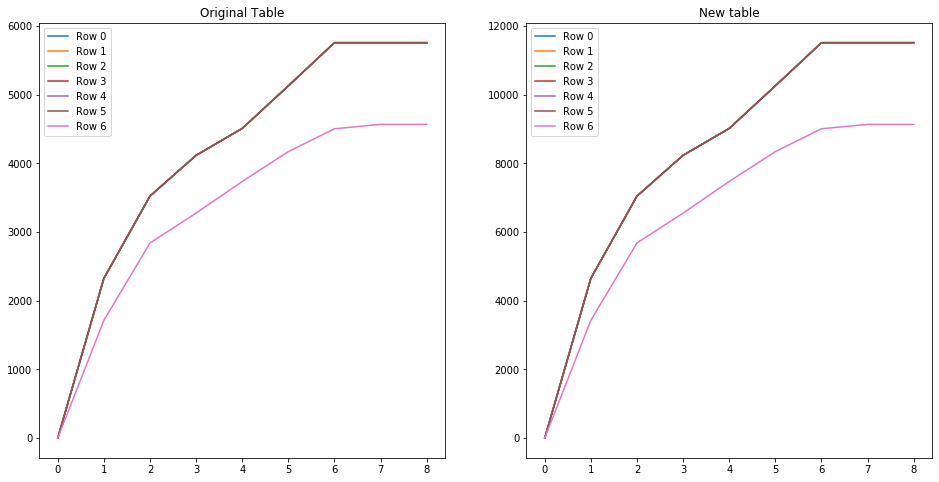

In [168]:
# 2X
value_table_2x = [x * 2 for x in value_table]
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(value_table_2x[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


[   0 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511
 5131 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0
 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511 5131
 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0 1715
 2842 3277 3738 4173 4506 4570 4570]


Text(0.5, 1.0, 'New table')

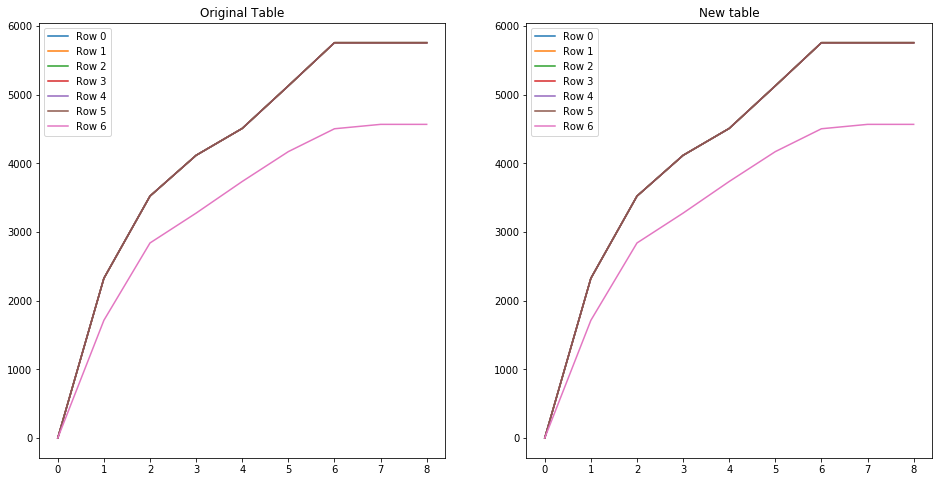

In [28]:
import numpy as np

# Non uniform scale
scales = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
assert len(scales) == 9, 'Should be 9!!!'

new_table = np.array(value_table) * np.tile(scales, 7).astype(int)
print(new_table)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(new_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


In [107]:
from cffi import FFI
ffibuilder = FFI()

ffibuilder.cdef("int translate_value_between_tables(short, short*, short *, unsigned int);")

ffibuilder.set_source("table",
r"""

static int indexOfFirstElementSmallerThanParam1(short value,short *search_table,int new_top) {
  int bottom;
  int new_bottom;
  int current;
  int bottom_plus_top;
  
  new_top = new_top + -1;
  current = (int)(char)new_top;
  bottom_plus_top = current + (uint)(current < 0);
  bottom = 0;
  while ('\x01' < (char)current) {
    current = (int)(char)(bottom_plus_top >> 1);
    new_bottom = current;
    if (value < search_table[current]) {
      new_bottom = bottom;
      new_top = current;
    }
    bottom_plus_top = (int)(char)((char)new_bottom + (char)new_top);
    bottom_plus_top = bottom_plus_top + (uint)(bottom_plus_top < 0);
    current = new_top - new_bottom;
    bottom = new_bottom;
  }
  return bottom_plus_top >> 1;
}

static int translate_value_between_tables
              (short requested_torque,short *src_table,short *dst_table,unsigned int row_length)

{
  uint index_in_table;
  int temp;
  int diff_between_table_elements;
  int requested_torque_local;

  requested_torque_local = (int)requested_torque;
                    // Greater than 0
  if (*src_table < requested_torque_local) {
    temp = (row_length & 0xff) - 1;
                    // Smaller than 400
    if (requested_torque_local < src_table[temp]) {
      index_in_table =
           indexOfFirstElementSmallerThanParam1(requested_torque,src_table,row_length & 0xff);
      index_in_table = index_in_table & 0xff;
      temp = (int)dst_table[index_in_table];
      diff_between_table_elements =
           (int)src_table[index_in_table + 1] - (int)src_table[index_in_table];
      if (diff_between_table_elements == 0) {
        temp = temp + dst_table[index_in_table + 1];
        temp = (int)(temp + (uint)(temp < 0)) >> 1;
      }
      else {
        temp = ((requested_torque_local - (int)src_table[index_in_table]) *
               (dst_table[index_in_table + 1] - temp)) / diff_between_table_elements + temp;
      }
      if (temp < -0x7fff) {
        temp = -0x7fff;
      }
      else {
        if (0x7fff < temp) {
          temp = 0x7fff;
        }
      }
    }
    else {
      temp = (int)dst_table[temp];
    }
  }
  else {
    temp = (int)*dst_table;
  }
  return temp;
}
""")

ffibuilder.compile(verbose=True)

generating ./table.c
the current directory is '/home/nanami/rwd-xray/tools'
running build_ext
building 'table' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c table.c -o ./table.o
x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 ./table.o -o ./table.cpython-37m-x86_64-linux-gnu.so


'/home/nanami/rwd-xray/tools/table.cpython-37m-x86_64-linux-gnu.so'

In [108]:
from table import ffi, lib

kt = ffi.new("short[]", key_table)
vt = ffi.new("short[]", value_table)

result = lib.translate_value_between_tables(0x123, key_table, value_table, 9)
print(result)

3071


In [189]:
import csv

#csv_path = '/home/nanami/data/honda_civic_touring_2016_can_generated-stock.csv'
csv_path = '/home/nanami/data/honda_civic_touring_2016_can_generated_2x.csv'

steering_control_frames_labels = []
steering_control_frames = []
steering_motor_torque_labels = []
steering_motor_torque_frames = []
with open(csv_path) as f:
  lines = csv.reader(f, delimiter=',')
  lines = list(lines)
  titles = lines[1]
  print(lines[0])
  for l in lines[1:]:
    if int(l[1]) == 0xe4 and (int(l[2]) == 128 or int(l[2]) == 130):
      # 7|16 signed
      e4_torque = int(l[3][:4], 16)
      if e4_torque > 0x7FFF:
        e4_torque -= 0x10000
      steering_control_frames_labels.append(float(l[0]))
      steering_control_frames.append(e4_torque)
    elif int(l[1]) == 0x1ab and int(l[2]) == 0:
      # 1|10 unsigned
      motor_torque = int(l[3][:4], 16) & 0x03FF
      steering_motor_torque_labels.append(float(l[0]))
      steering_motor_torque_frames.append(motor_torque)
    

['time', 'addr', 'bus', 'data']


In [190]:
print(len(steering_control_frames_labels))
print(len(steering_motor_torque_labels))

3000
1500


In [195]:
import math
# eps emulation
def can_e4_handler(can_e4_input_torque, keys, values):
    # Step 1
    x = int(can_e4_input_torque * math.sqrt(3))
    # Step 2
    x = x >> 2
    # Step 4
    x = lib.translate_value_between_tables(x, keys, values, 9)
    return x
    

Text(0.5, 1.0, '0x1ab Motor Torque')

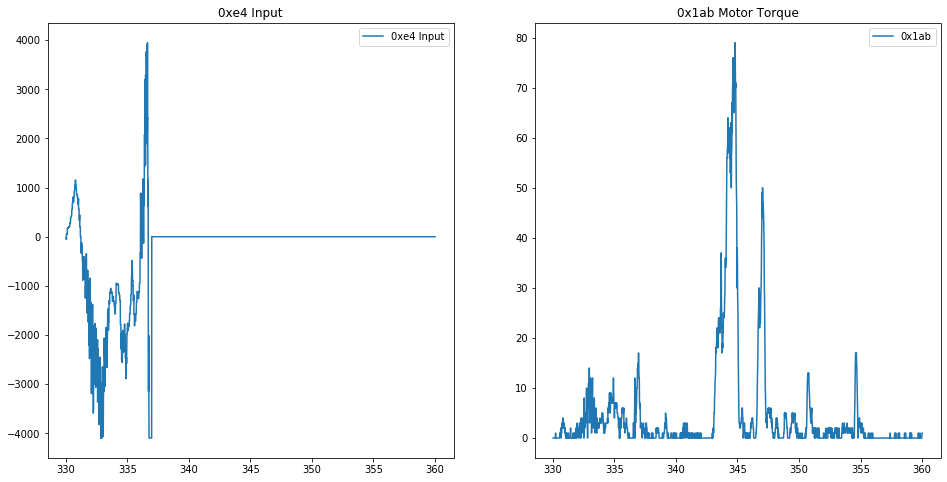

In [196]:
plt.subplot(1, 2, 1)
plot(steering_control_frames_labels, steering_control_frames, label='0xe4 Input')
plt.legend()
plt.title("0xe4 Input")

plt.subplot(1, 2, 2)
plot(steering_motor_torque_labels, steering_motor_torque_frames, label='0x1ab')
plt.legend()
plt.title("0x1ab Motor Torque")



Text(0.5, 1.0, 'Predictions')

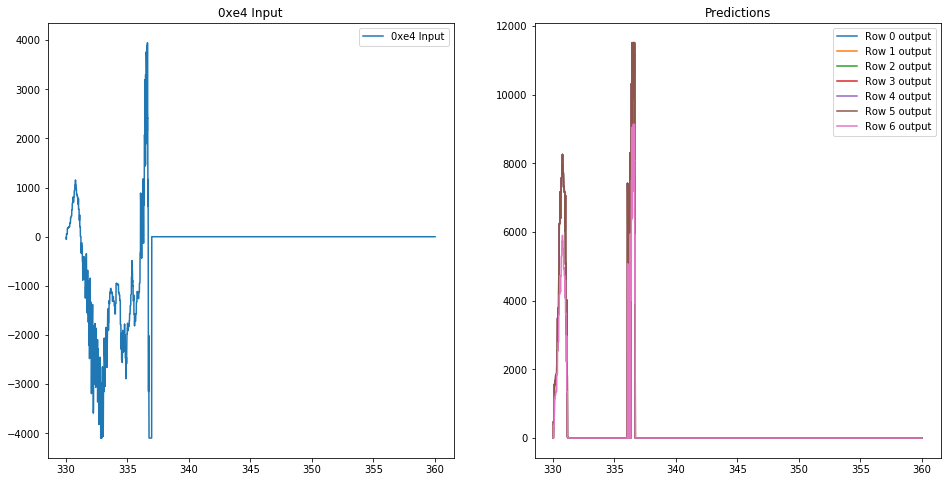

In [197]:
plt.subplot(1, 2, 1)
plot(steering_control_frames_labels, steering_control_frames, label='0xe4 Input')
plt.legend()
plt.title("0xe4 Input")

plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  predictions = [can_e4_handler(x, key_table[i:i+9], value_table_2x[i:i+9]) for x in steering_control_frames]
  plot(steering_control_frames_labels, predictions, label='Row {} output'.format(i // 9))
plt.legend()
plt.title("Predictions")
